import library

In [6]:
import numpy as np
import os
import shutil
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Load Dataset

In [7]:
IMAGE_SIZE = 264
IMAGE_SIZE = 264
BATCH_SIZE = 16
Channels = 3
epochs = 30

In [8]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "Blood cell Cancer [ALL]",
    shuffle = True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 3242 files belonging to 4 classes.


In [9]:
class_names = dataset.class_names
class_names

['Benign', '[Malignant] Pre-B', '[Malignant] Pro-B', '[Malignant] early Pre-B']

In [10]:
len(dataset)

203

In [11]:

for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)


(264, 264, 3)


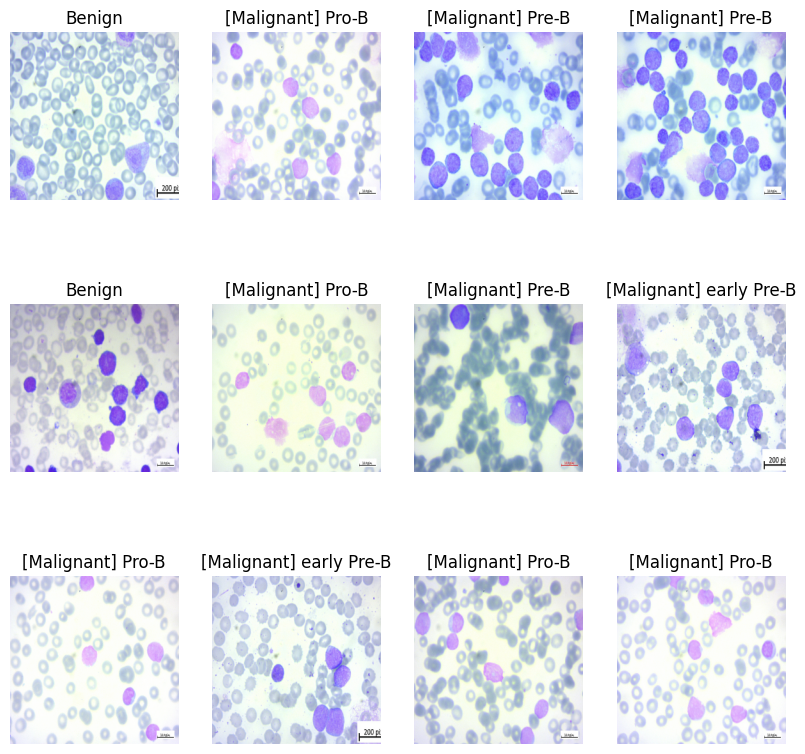

In [12]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
                 ax=plt.subplot(3,4,i+1)     
    
                 plt.imshow(image_batch[i].numpy().astype("uint8"))
                 plt.title(class_names[label_batch[i]])
                 plt.axis("off")
                  
                 
             

Spliting_Dataset

In [13]:
len(dataset)

203

In [14]:
#80% ==> training 
# 20% ==> 10% validation , 10% test

In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
      ds=ds.shuffle(shuffle_size,seed=12)
      train_size = int(train_split*ds_size)
      val_size = int(val_split*ds_size)

      train_ds= ds.take(train_size)
      val_ds = ds.skip(train_size).take(val_size)
      test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds,test_ds

In [16]:
train_ds, val_ds,test_ds =get_dataset_partitions_tf(dataset)


In [17]:
len(train_ds)


162

In [18]:
len(test_ds)

21

In [19]:
len(val_ds)

20

# Data preprocessing

In [20]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    ])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    ])

# CNN Model

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_filepath = "Blood cell Cancer [ALL]"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor ='val_accuracy',
    mode ='max',
    save_best_only=True,
    verbose=2
  
)

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, Channels)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax')
])

model.build(input_shape = input_shape)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 264, 264, 3)         0         
                                                                 
 sequential_1 (Sequential)   (16, 264, 264, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 262, 262, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (16, 131, 131, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (16, 129, 129, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (16, 64, 64, 64)         0         
 2D)                                                  

In [21]:

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [27]:
history = model.fit( 
    train_ds, 
    epochs= 30,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1
       )
 

Epoch 1/30
162/162 [==============================] - 134s 479ms/step - loss: 1.7104 - accuracy: 0.5696 - val_loss: 0.7033 - val_accuracy: 0.7219
Epoch 2/30
162/162 [==============================] - 70s 434ms/step - loss: 0.6032 - accuracy: 0.7610 - val_loss: 0.6005 - val_accuracy: 0.7625
Epoch 3/30
162/162 [==============================] - 70s 433ms/step - loss: 0.5674 - accuracy: 0.7776 - val_loss: 1.1490 - val_accuracy: 0.4625
Epoch 4/30
162/162 [==============================] - 70s 432ms/step - loss: 0.4435 - accuracy: 0.8380 - val_loss: 0.4241 - val_accuracy: 0.8406
Epoch 5/30
162/162 [==============================] - 70s 434ms/step - loss: 0.4039 - accuracy: 0.8623 - val_loss: 0.3320 - val_accuracy: 0.8687
Epoch 6/30
162/162 [==============================] - 72s 447ms/step - loss: 0.2869 - accuracy: 0.8940 - val_loss: 0.2463 - val_accuracy: 0.9156
Epoch 7/30
162/162 [==============================] - 76s 467ms/step - loss: 0.2490 - accuracy: 0.9138 - val_loss: 0.2970 - val_a

In [29]:
scores = model.evaluate(test_ds)

21/21 [==============================] - 6s 87ms/step - loss: 0.1464 - accuracy: 0.9494


In [30]:
scores

[0.14641132950782776, 0.949404776096344]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 162}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

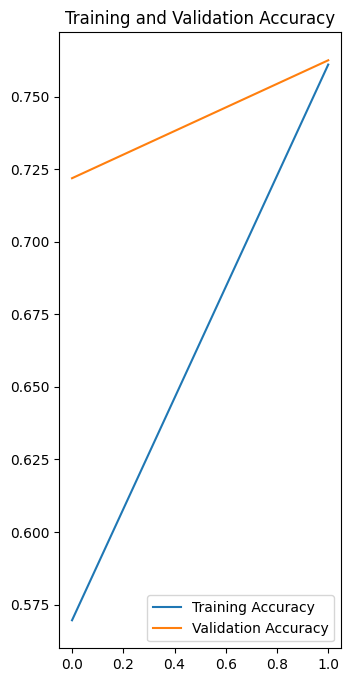

In [35]:

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs)[:2],acc[:2],label='Training Accuracy')
plt.plot(range(epochs)[:2],val_acc[:2],label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation loss')

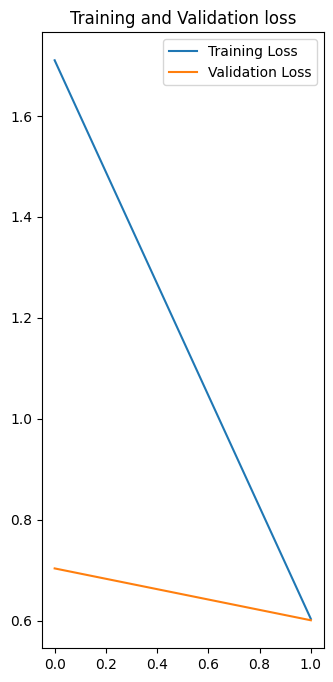

In [36]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs)[:2],loss[:2],label='Training Loss')
plt.plot(range(epochs)[:2],val_loss[:2],label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')

First Image to predict
First image's actual label: [Malignant] Pro-B
1/1 [==============================] - 0s 186ms/step
predicted label: [Malignant] Pro-B


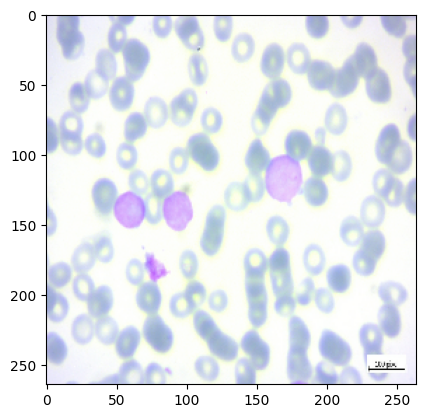

In [37]:
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("First Image to predict")
    plt.imshow(first_image)
    print("First image's actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])]);

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [23]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}.\n Confidence:{confidence}%")

        plt.axis("off")

In [40]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


# Res NET model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def resnet(input_shape, n_classes=4):
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())

  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.25))

  model.add(Dense(4, activation='softmax'))

  return model

In [26]:
model = resnet((264, 264, 3), 4)

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 262, 262, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 131, 131, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 129, 129, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 128)     

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(
        train_ds, 
        epochs=30, 
        batch_size=BATCH_SIZE,
        validation_data=val_ds, 
        verbose=1)

Epoch 1/30
162/162 [==============================] - 101s 505ms/step - loss: 20.4023 - accuracy: 0.3028 - val_loss: 1.3702 - val_accuracy: 0.2937
Epoch 2/30
162/162 [==============================] - 77s 478ms/step - loss: 1.3637 - accuracy: 0.3055 - val_loss: 1.3618 - val_accuracy: 0.2937
Epoch 3/30
162/162 [==============================] - 76s 468ms/step - loss: 1.3527 - accuracy: 0.3055 - val_loss: 1.2257 - val_accuracy: 0.5188
Epoch 4/30
162/162 [==============================] - 76s 468ms/step - loss: 1.1068 - accuracy: 0.5170 - val_loss: 1.0030 - val_accuracy: 0.5906
Epoch 5/30
162/162 [==============================] - 76s 468ms/step - loss: 0.9139 - accuracy: 0.6195 - val_loss: 0.7596 - val_accuracy: 0.6969
Epoch 6/30
162/162 [==============================] - 77s 477ms/step - loss: 0.7909 - accuracy: 0.6748 - val_loss: 0.9123 - val_accuracy: 0.6094
Epoch 7/30
162/162 [==============================] - 78s 485ms/step - loss: 0.7117 - accuracy: 0.7270 - val_loss: 0.8957 - val_

In [31]:
scores = model.evaluate(test_ds)

21/21 [==============================] - 8s 93ms/step - loss: 0.2368 - accuracy: 0.9554


In [32]:
scores

[0.23676429688930511, 0.9553571343421936]

In [33]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 162}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'Training and Validation Accuracy')

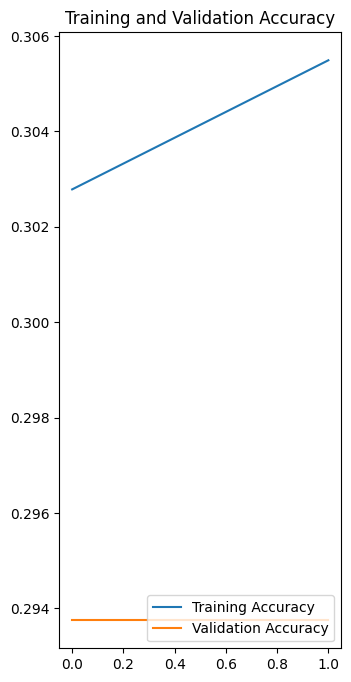

In [36]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs)[:2],acc[:2],label='Training Accuracy')
plt.plot(range(epochs)[:2],val_acc[:2],label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation loss')

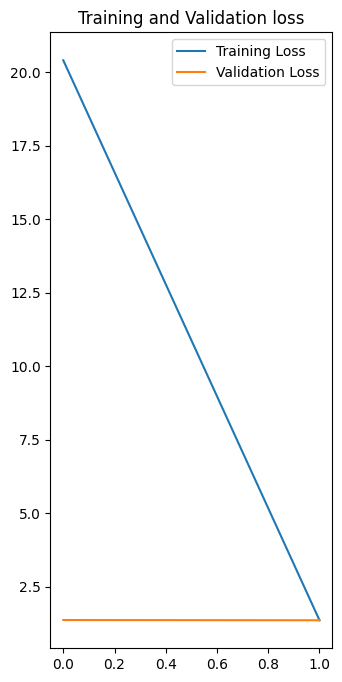

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs)[:2],loss[:2],label='Training Loss')
plt.plot(range(epochs)[:2],val_loss[:2],label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')

First Image to predict
First image's actual label: [Malignant] Pro-B
1/1 [==============================] - 0s 220ms/step
predicted label: [Malignant] Pro-B


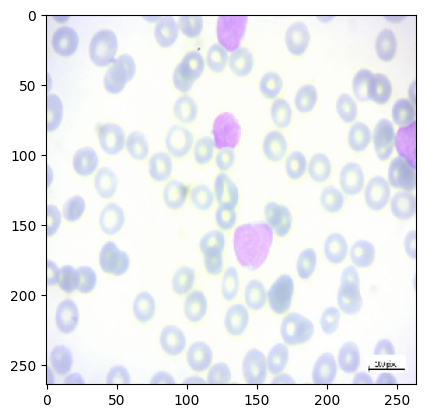

In [38]:
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("First Image to predict")
    plt.imshow(first_image)
    print("First image's actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])]);

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step


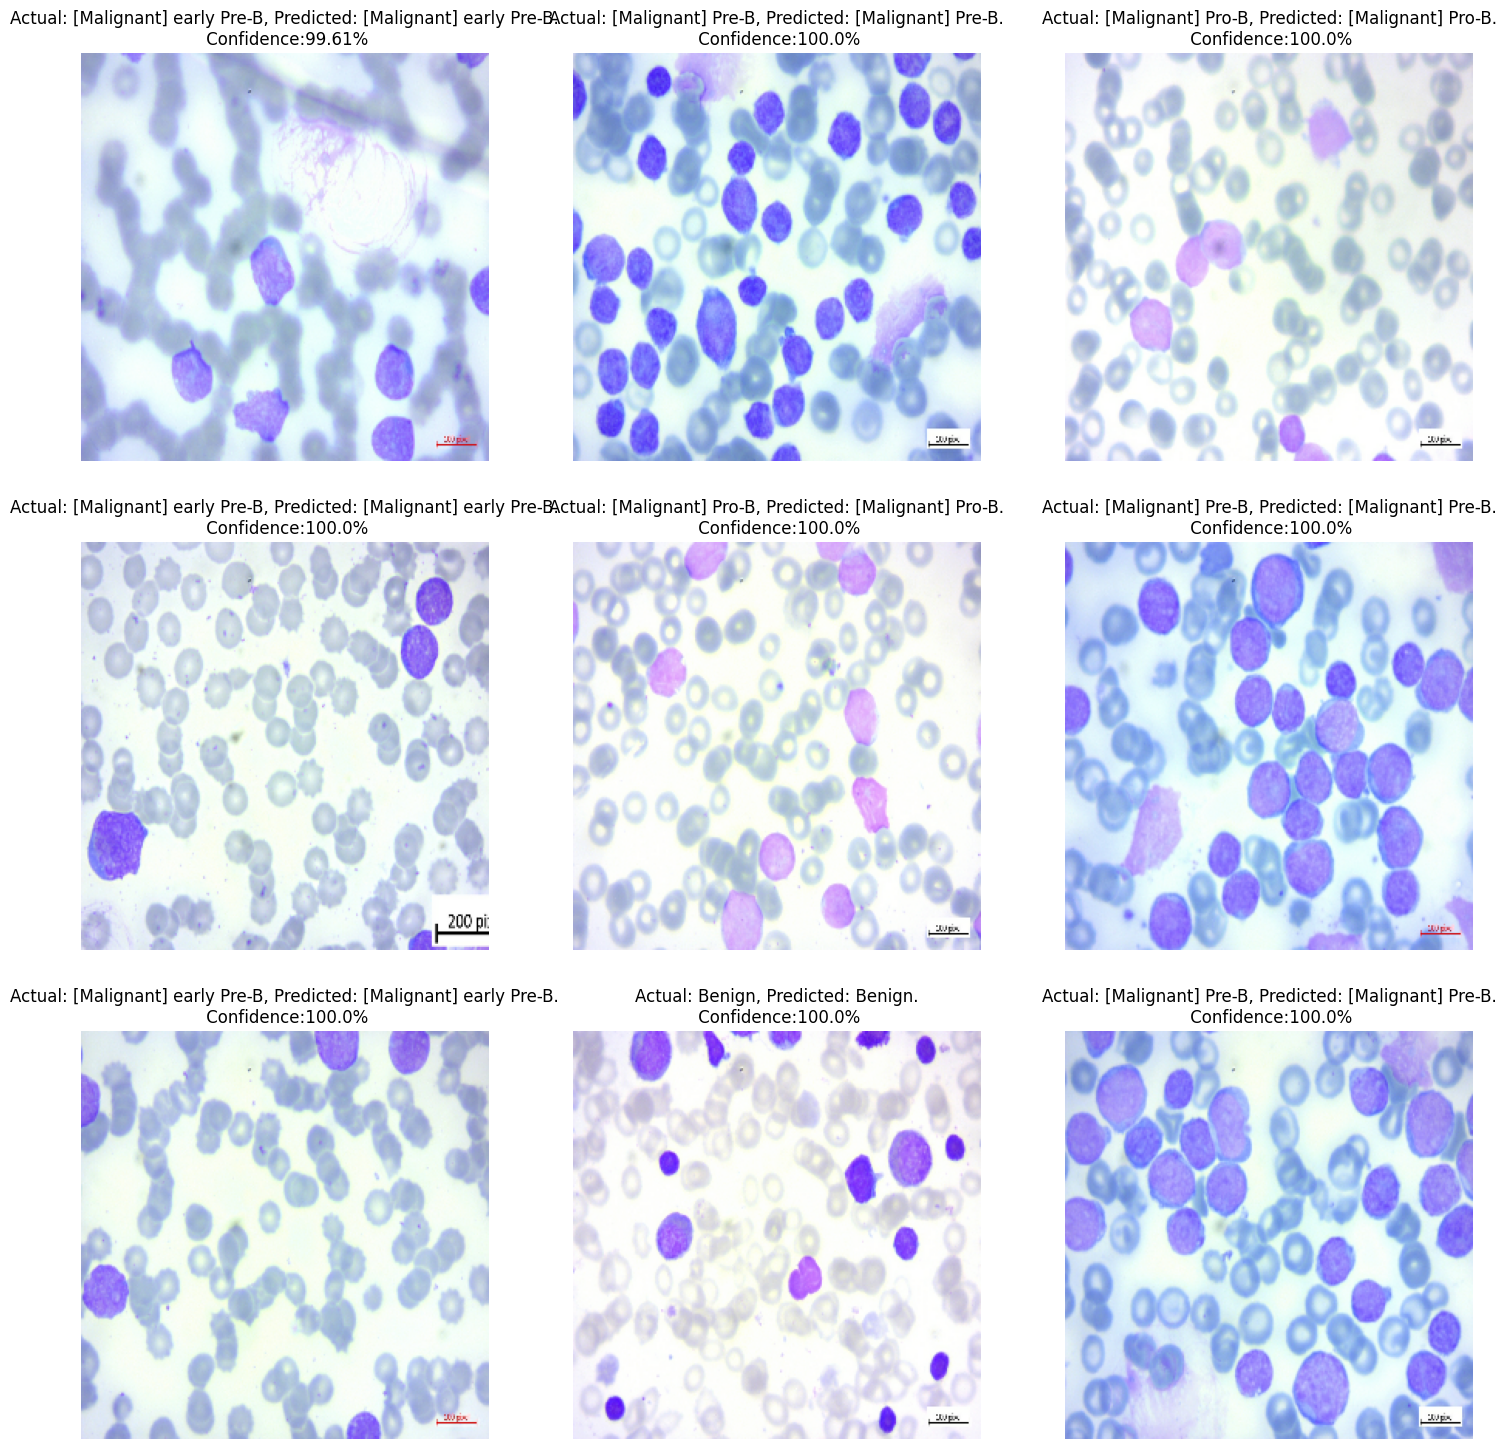

In [40]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}.\n Confidence:{confidence}%")

        plt.axis("off")

In [41]:
model_version = 2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
